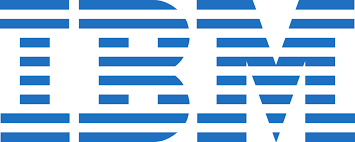



# Business Problem

## 💼 Attrition in an Organization || Why Workers Quit?

---

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact in productivity
> 1. Impact profit

Currently, our company is experiencing a departure of a significant number of former employees, comprising approximately 16% of our workforce.

___
 Objective : Figure out why Workers Quit
___

___
 Expected Output : Reccomendation to improve in IBM how to reduce their attrition rate from 16% to 9% annually by the end of the year
___

# Library Preparation

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

In [ ]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00


In [ ]:
import hvplot

In [ ]:
import re
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
pd.options.display.float_format = '{:,.2f}'.format # add thousand separator for float (salah satu aja)

# Dataset

In [ ]:
# Open Google Sheet file
sheet_url = 'https://docs.google.com/spreadsheets/d/18Lvnq5HqI1iBoOcjDKX4c5A_SjGg8-rmXhYMp1KqMek/edit#gid=2077431593'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/18Lvnq5HqI1iBoOcjDKX4c5A_SjGg8-rmXhYMp1KqMek/export?format=csv&gid=2077431593


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,4,0,5,0
1,49,2,279,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,7,1,7,1
2,37,1,1373,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,2,1392,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,7,3,0,1
4,27,1,591,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,1


In [ ]:
hr = df.copy()

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   int64 
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Data Cleaning

## Change Data Type

## Check Missing Value

In [ ]:
hr.isna().sum() #missing value check

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

## Check Duplicate

In [ ]:
hr[hr['EmployeeNumber'].duplicated()]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition


## Check Typo For Categorical Data

In [ ]:

hr['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:

hr['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:

hr['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

i= 0 el Age
i= 1 el DistanceFromHome
i= 2 el EnvironmentSatisfaction
i= 3 el MonthlyIncome
i= 4 el DailyRate
i= 5 el WorkLifeBalance
i= 6 el MonthlyRate
i= 7 el YearsWithCurrManager


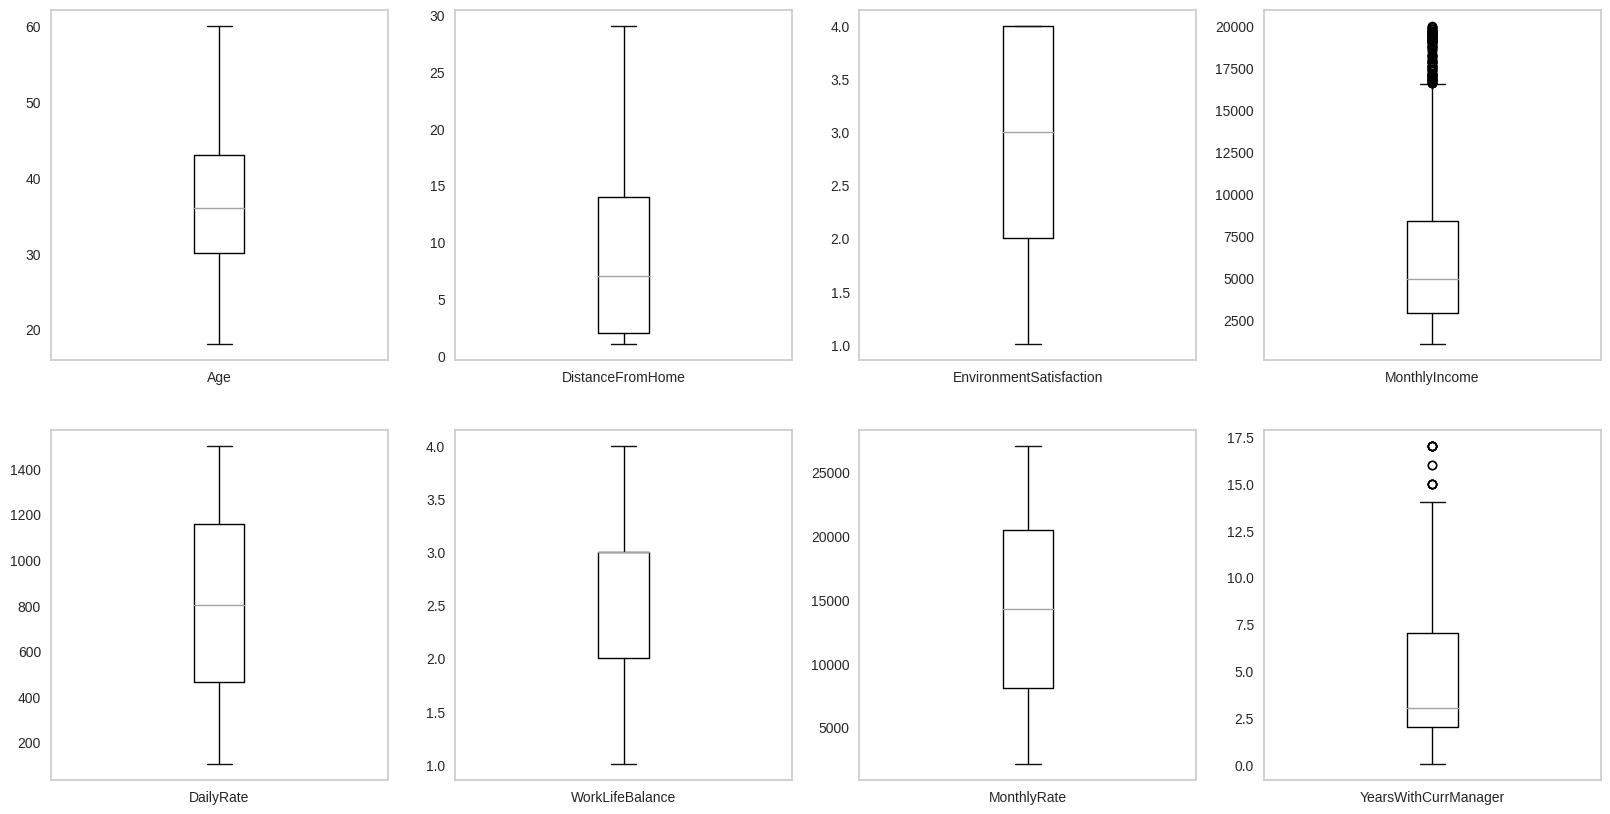

In [ ]:
numerical_column = ['Age','DistanceFromHome','EnvironmentSatisfaction','MonthlyIncome','DailyRate','WorkLifeBalance','MonthlyRate','YearsWithCurrManager']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = hr.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Overall the data is well distribute as for MonthlyIncome even though its outlier but the datapoint is **well distribute**, so we are not going to delete/archive the outliers. but for Monthly Income we can considered using Median

# 📊 Exploratory Data Analysis

## 📉 Categorical Features

In [ ]:
object_col = []
for column in hr.columns:
    if hr[column].dtype == object and len(hr[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {hr[column].unique()}")
        print(hr[column].value_counts())
        print("====================================")

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Marit

In [ ]:
len(object_col)

6


## 📉 Numerical Features

In [ ]:
disc_col = []
for column in hr.columns:
    if hr[column].dtypes != object and hr[column].nunique() < 30:
        print(f"{column} : {hr[column].unique()}")
        disc_col.append(column)
        print("====================================")

BusinessTravel : [1 2 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
Gender : [0 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
Attrition : [0 1]


In [ ]:
cont_col = []
for column in hr.columns:
    if hr[column].dtypes != object and hr[column].nunique() > 30:
        print(f"{column} : Minimum: {hr[column].min()}, Maximum: {hr[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
EmployeeNumber : Minimum: 1, Maximum: 2068
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40


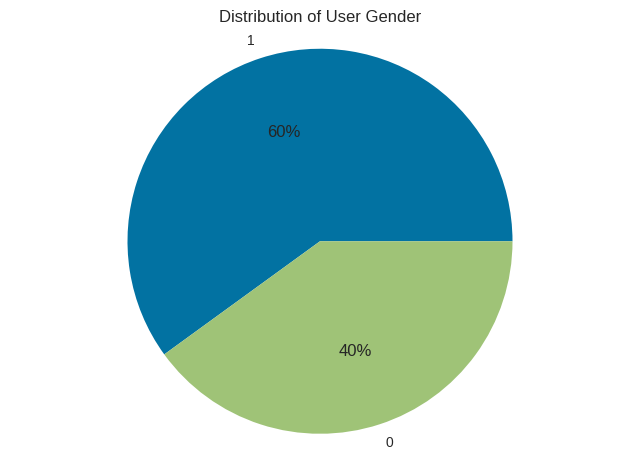

In [ ]:
# Calculate the count of occurrences for each user gender
gender_counts = hr['Gender'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%')

# Add a title and adjust the aspect ratio
plt.title('Distribution of User Gender')
plt.axis('equal')

# Display the chart
plt.show()

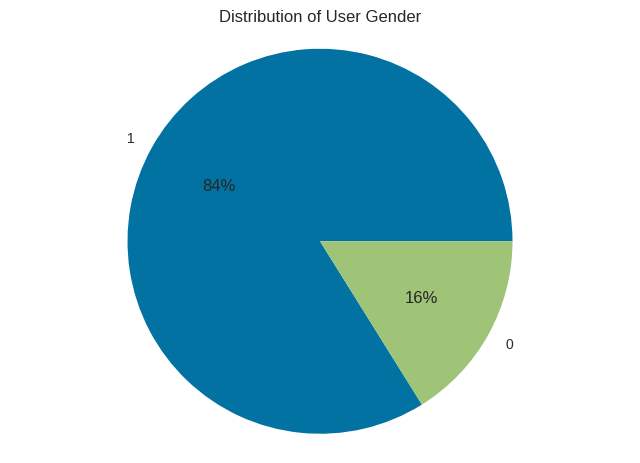

In [ ]:
# Calculate the count of occurrences for each user gender
gender_counts = hr['Attrition'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%')

# Add a title and adjust the aspect ratio
plt.title('Distribution of User Gender')
plt.axis('equal')

# Display the chart
plt.show()

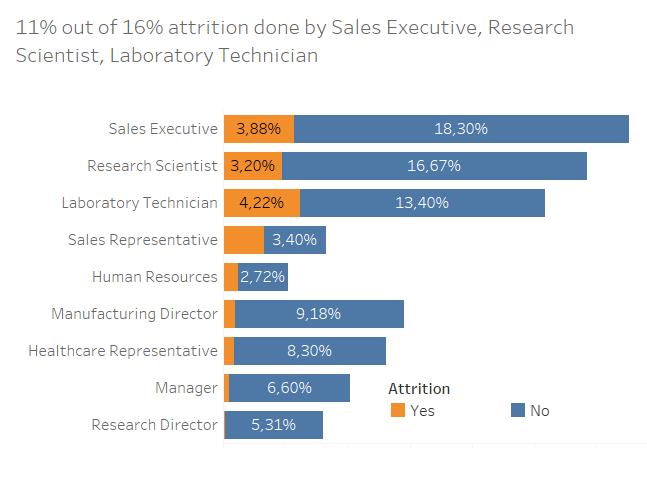

## Figuring out The Reason Why Our Employee Leaves

___
###* _Low WorkLife Balance_
___

 10.55% Our Former Employee Surveyed on Bad Work Life Balance 😞




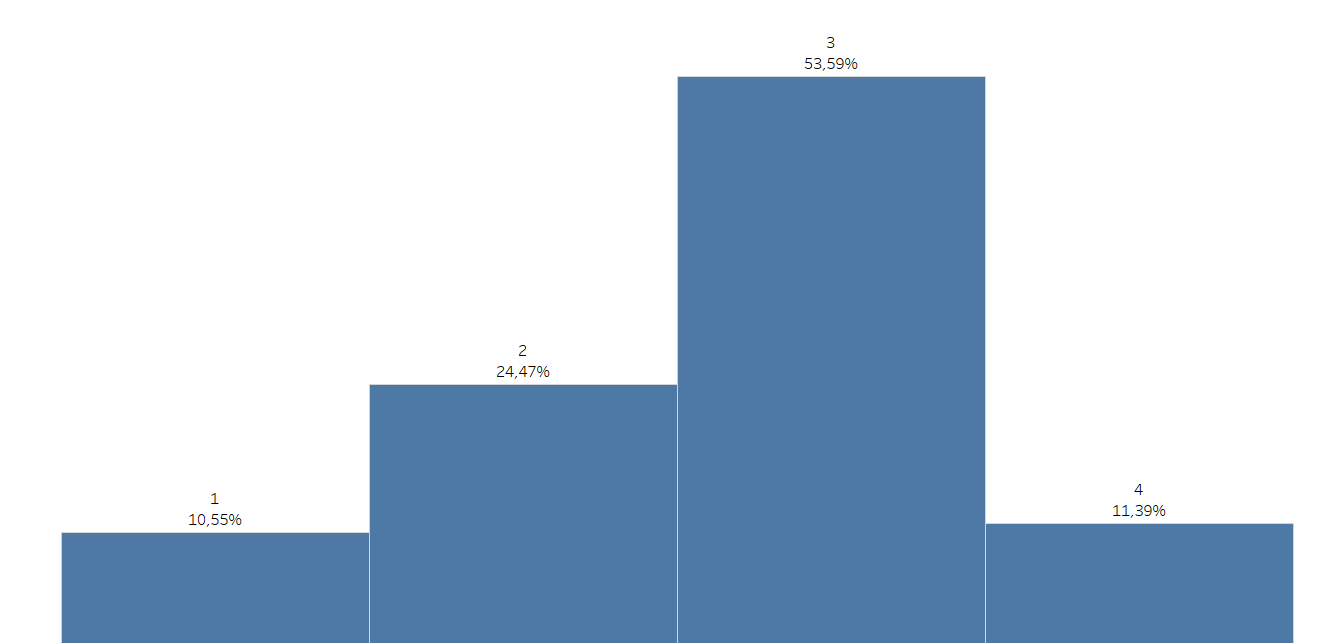

___
###* _Low Job Statisfaction_
___

`27.85%` of our former employee indicate that they have Low Job Statisfaction

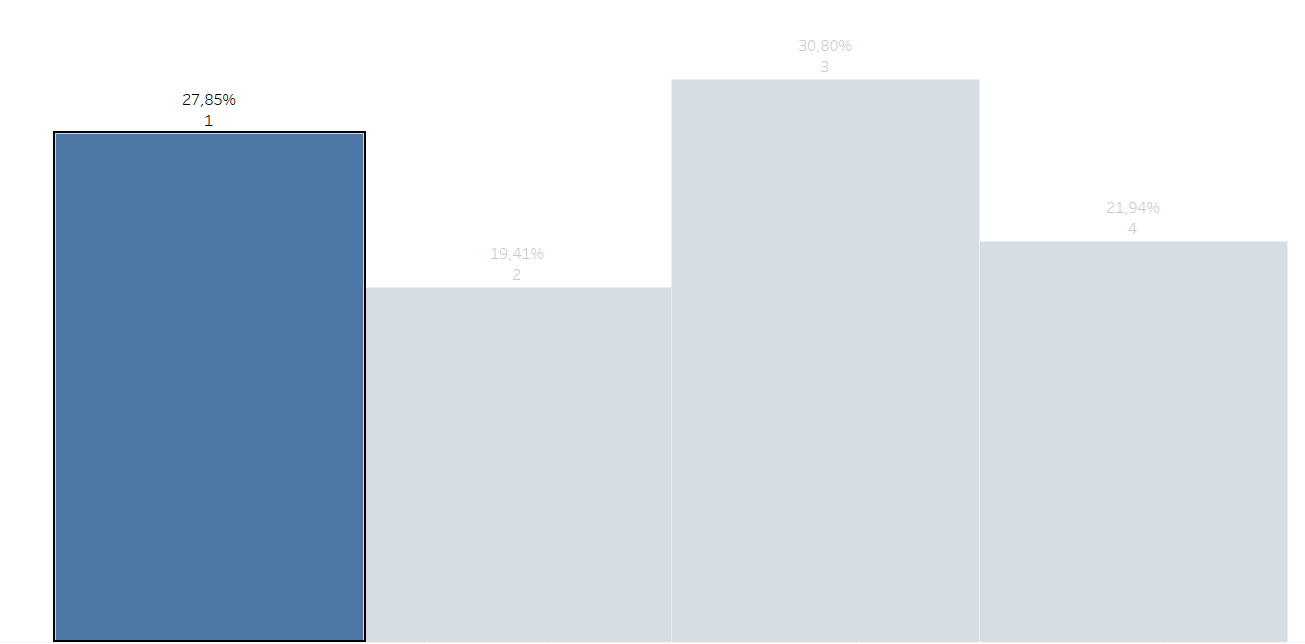

___
### * _Bad Environment_
___

`30.38%` of our former employee indicate that they have experience Bad Environment

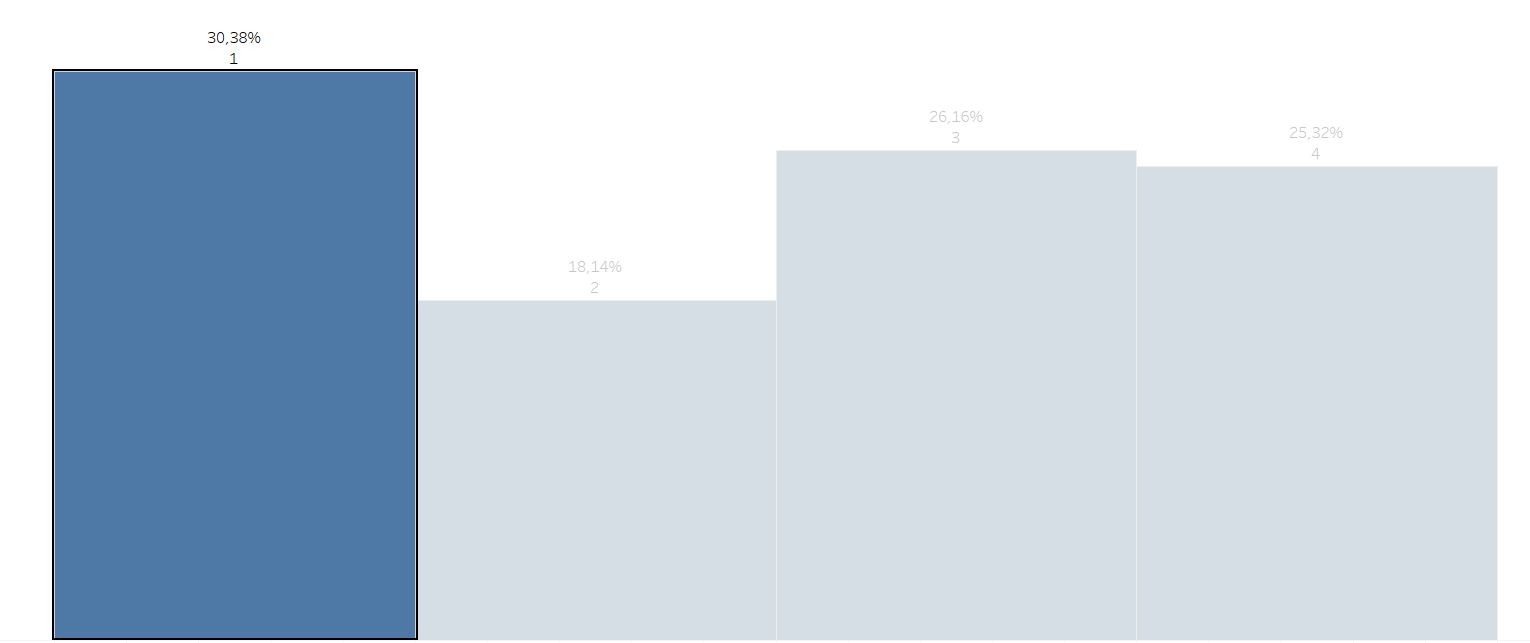

___
###* _Low Income_
___

In [ ]:
hr['MonthlyIncome'].describe()

count    1,470.00
mean     6,502.93
std      4,707.96
min      1,009.00
25%      2,911.00
50%      4,919.00
75%      8,379.00
max     19,999.00
Name: MonthlyIncome, dtype: float64

In [ ]:
from scipy.stats import skew

# Assuming your DataFrame is named hr

# Calculate skewness
skewness = skew(hr['MonthlyIncome'])

# Print the result
print("Skewness:", skewness)

Skewness: 1.3684185123330814


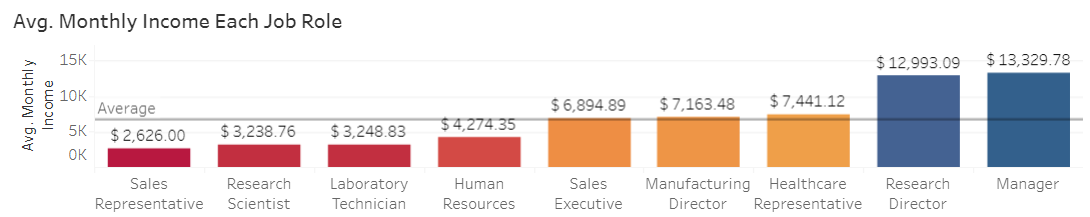

Number of Former Employee whose MonthlyIncome Below
1.   Q1 = 108(45.57%)
2.   Average = 185(78.06%)

This indicate 45.57% former employee got the MonthlyIncome Below Q1 but when we look for skewness the result is more than 1% This indicates that there are relatively fewer individuals with high monthly incomes compared to the number of individuals with lower incomes.


___
* _They have been in the same role for years_
___

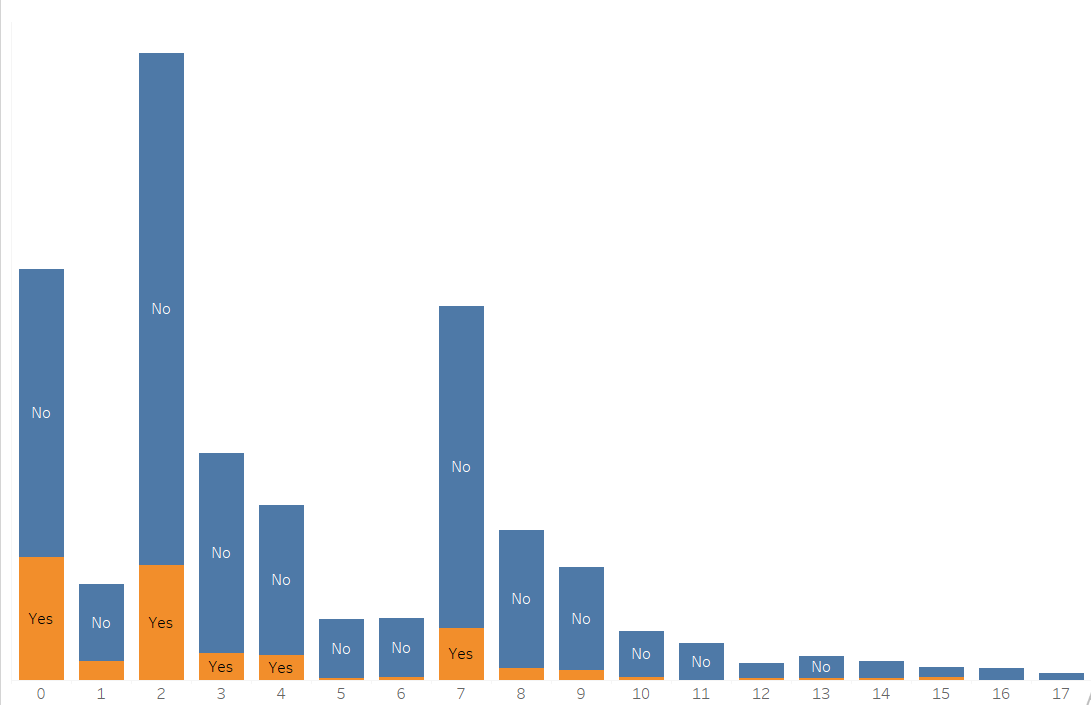

Many of our former employees tended to leave the company within their first, second, or seventh year in the same role. This pattern suggests that these employees may not have been well-suited for the role despite having a moderate level of experience. Additionally, it is noteworthy that they had been with the company for a considerable amount of time before deciding to leave.

___
###* _Overtime_
___

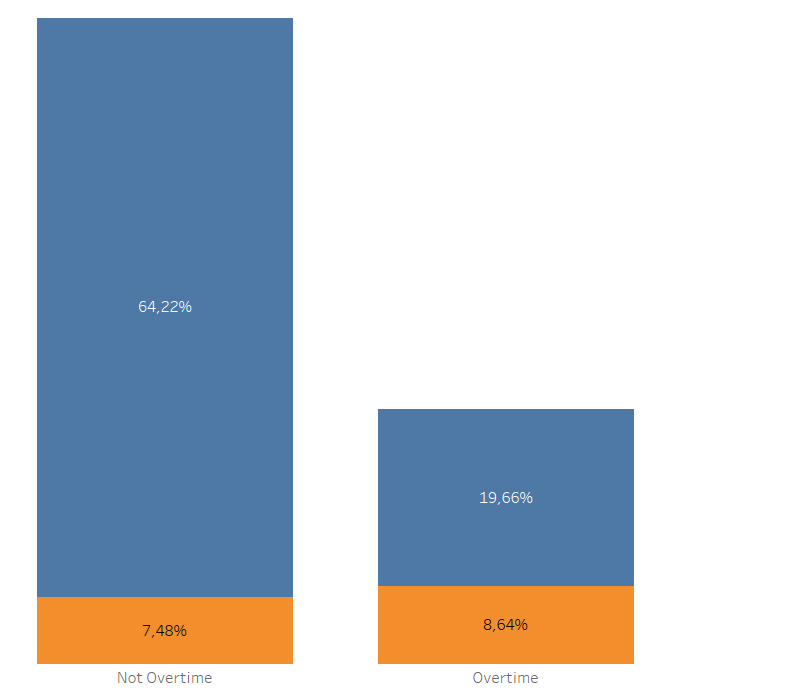

8.64% of our Former Employee leaves and survey they have work overtime

___
###* _Stock Option_
___

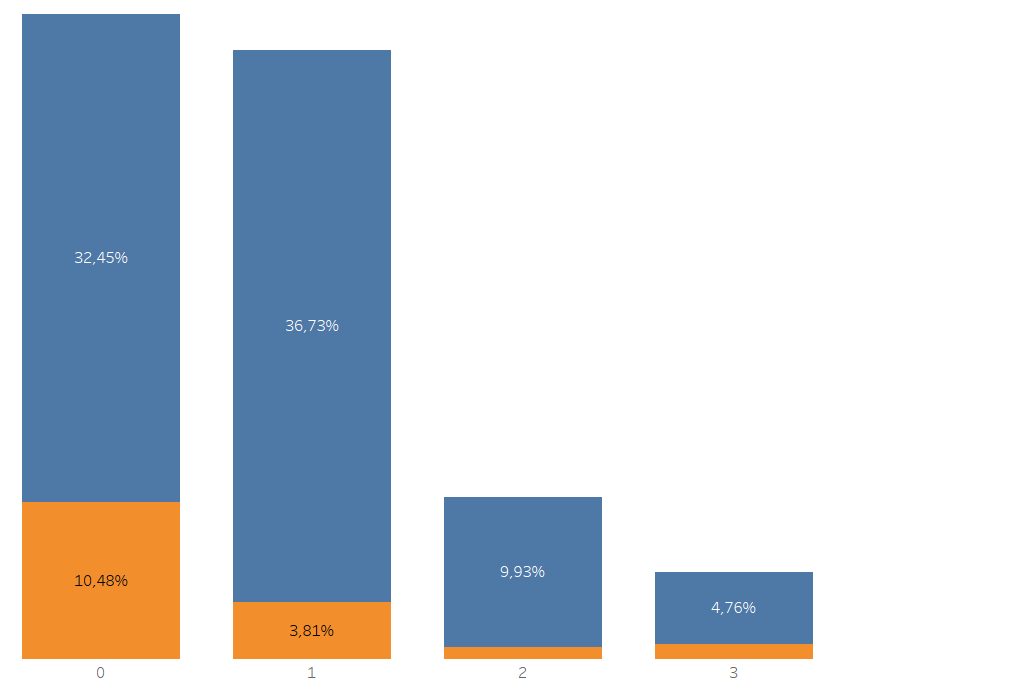

Only 14% of our former employees received stock at level 0 and level 1, while a significantly smaller number of individuals were granted stock at level 2 and level 3.

___
###* _Stock Option_
___

---
# 📉 Correlation Analysis

## Data Preparation

In [ ]:
numerical_column = []
for i in hr.columns:
  if hr[i].dtypes == 'int64' or hr[i].dtypes == 'float64':
    numerical_column.append(i)

binary_categorical_column = ['Gender']
polytomous_categorical_column = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
all_categorical_column = binary_categorical_column+polytomous_categorical_column

In [ ]:
hr2 = hr.copy()
for i in binary_categorical_column:
  hr2[i] = hr2[i].astype('category')
  hr2[i] = hr2[i].cat.codes

In [ ]:
hr2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,4,0,5,0
1,49,2,279,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,7,1,7,1
2,37,1,1373,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,2,1392,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,7,3,0,1
4,27,1,591,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,1


In [ ]:
hr2.drop(polytomous_categorical_column, axis=1, inplace=True)

In [ ]:
# Remove the "Employee Count" and "Standard Hours" columns
hr2 = hr2.drop(['EmployeeCount', 'StandardHours'], axis=1)

# Print the updated DataFrame
print(hr2)

KeyError: "['EmployeeCount', 'StandardHours'] not found in axis"

In [ ]:
hr2.info()

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(hr2.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 15})

plt.show()

In [ ]:
corr_column_new = []
corr_column_new = hr2.corr().abs().nlargest(11, "Attrition").Attrition.sort_values(ascending=False).index
corr_column_new

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('10 Variables with Highest Correlation to Attrition')

mask = np.triu(np.ones_like(
    hr2[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(hr2[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='RdYlGn',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

## 📝 **Analysis of correlation results (sample analysis):**
There are multicoloniarity in our correlation mattrix such as
1. Years At Company and Years in Current Role = 0.76
2. Years With Current Manager and Years At Company - 0.77
3. Total Working Years and Monthly Income = 0.77
4. Total Working Years and Job Level = 0.78
5. Years In Current Role and Years With Current Manager = 0.71

This indicate:
1. The more we work in the company the more Monthly Income we get
2. We can delete because the value above 0.70 indicate multicolonirarity and if we see the relation between column its pretty obvious